<style>
    @media print{
        body {
            position:relative !important;
        }
        .celltag_new_page {
            page-break-before: always !important;
        }
    }
</style>
# COMPSCI 371 Homework 1

Group Members: Brian Janger, Matthew Wang, Caleb Watson

### Problem 0 (3 points)

## Part 1: Polynomial Fitting 

In [1]:
import numpy as np
from itertools import combinations_with_replacement as combos


def monomials(d, k):
    c = np.array(list(combos(range(d + 1), k)))
    m = np.zeros((c.shape[0], d))
    for j in range(d):
        m[:, j] = np.sum(c == j, axis=1)
    order = np.argsort(np.sum(m, axis=1))
    return m[order]

### Problem 1.1 (Exam Style Except for the Code)

The number of rows $r$ returned by monomials is equal to the total number of monomials of degree up to $k$, or ${d+k}\choose{k}$. 

In [2]:
# initializing arrays to hold combinations of d and k values
d_array = []
k_array = []
for i in range(0, 16): 
    d_array.append(i)
for i in range(0, 9): 
    k_array.append(i)

In [3]:
import math 

# creating table containing all values of r for a given d and k 
combinations = []
for d in d_array: 
    cur_row = []
    for k in k_array: 
        cur_row.append(math.comb(d + k, k))
    combinations.append(cur_row)
print(np.array(combinations))

[[     1      1      1      1      1      1      1      1      1]
 [     1      2      3      4      5      6      7      8      9]
 [     1      3      6     10     15     21     28     36     45]
 [     1      4     10     20     35     56     84    120    165]
 [     1      5     15     35     70    126    210    330    495]
 [     1      6     21     56    126    252    462    792   1287]
 [     1      7     28     84    210    462    924   1716   3003]
 [     1      8     36    120    330    792   1716   3432   6435]
 [     1      9     45    165    495   1287   3003   6435  12870]
 [     1     10     55    220    715   2002   5005  11440  24310]
 [     1     11     66    286   1001   3003   8008  19448  43758]
 [     1     12     78    364   1365   4368  12376  31824  75582]
 [     1     13     91    455   1820   6188  18564  50388 125970]
 [     1     14    105    560   2380   8568  27132  77520 203490]
 [     1     15    120    680   3060  11628  38760 116280 319770]
 [     1  

### Problem 1.2

In [4]:
x = np.array([0.5, -0.2, 0.1])
d, k = len(x), 2

def evaluate_monomials(p, x):
    assert (len(x) == len(p[0])) #assures that monomial and vector sizes are consistent
    vector = []
    for monomial in p: 
        # resets the variable storing product of evaluating vector x at a given monomial 
        cur_product = 1
        for col in range(0, len(x)): 
            cur_product *= math.pow(x[col], monomial[col])
        vector.append(cur_product)
    return np.array(vector)

final_vector = evaluate_monomials(monomials(d, k), x)
print(final_vector)

assert (len(final_vector) == math.comb(d + k, k))

[ 1.    0.5  -0.2   0.1   0.25 -0.1   0.05  0.04 -0.02  0.01]


### Problem 1.3 (Exam Style if Table is Provided)

In [5]:
c = np.linspace(2, 0, 35)

The length of c is 35 coefficient. Given we are referencing vector $x$ of the previous problem with 3 entries, we know the total number of independent variables $d=3$. Using the above table, we can see that $k$ must be equal to 4, such that $\binom{d+k}{k} = \binom{3+k}{k} = \binom{7}{4} = 35$.

### Problem 1.4

In [6]:
x = np.array([0.5, -0.2, 0.1])
d, k = len(x), 4

def evaluate_polynomial(c, p, x):
    # ensure that p is the appropriate output for 
    assert (len(c) == len(p))
    y = 0 # initialize value to sum values of monomials
    monomials = evaluate_monomials(p,x)
    for i in range(len(c)):
        y += monomials[i]*c[i]
    return y
    
y = evaluate_polynomial(c, monomials(d,k), x)
print("The approximate value for y is: %f" % y)

The approximate value for y is: 3.230406


### Problem 1.5

In [7]:
n_train = 100
a, b = 2., 3.
sigma = 0.2
x_train = np.sort(np.random.rand(n_train))
noise = sigma * np.random.randn(n_train)
y_train = a + b * x_train + noise
x_train = np.expand_dims(x_train, axis=1)

In [8]:
import math
# computing matrix of the linear system to be solved
def fitting_matrix(p, X):
    n = len(X)
    matrix = []
    for i in range(0, n): 
        matrix.append(evaluate_monomials(p, X[i]))
    return np.array(matrix)

def predict(c, k, X):
    d = len(X[0])
    fit_matrix = fitting_matrix(monomials(d,k), X)
    y_predictions = []
    for i in range(0, len(X)): 
        product = c * fit_matrix[i]
        y_predictions.append(sum(product))
    return np.array(y_predictions)   
    
def residual_error(c, k, X, y):
    y_predictions = predict(c, k, X)
    quadratic_loss = np.square(y - y_predictions)
    emperical_risk = sum(quadratic_loss) / len(quadratic_loss)
    return math.sqrt(emperical_risk) # returning square root of the empirical risk

In [9]:
def fit(X, y, k):
    d = len(X[0])
    fit_matrix = fitting_matrix(monomials(d,k), X)
    c = np.linalg.lstsq(fit_matrix, y, rcond=None)[0]
    
    res_error = residual_error(c, k, X, y)
    return c, res_error

fit_results = fit(x_train, y_train, 1)
print("A: {}\nB: {}\nResidual Error: {}".format(fit_results[0][0], fit_results[0][1], fit_results[1]))

A: 1.9389914843562097
B: 3.0937943071378275
Residual Error: 0.19807897099907634


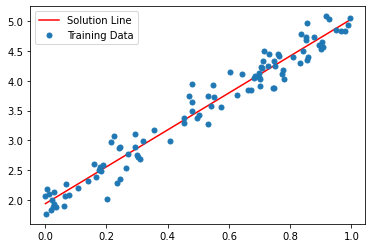

In [10]:
import matplotlib.pyplot as plt
a_predict = fit_results[0][0]
b_predict = fit_results[0][1]

plt.plot(x_train, b_predict*x_train + a_predict, 'r', label='Solution Line')
plt.plot(x_train, y_train, 'o', label='Training Data', markersize=5)
plt.legend()
plt.show()

### Problem 1.6

In [11]:
def eigen_data(n):
    X = np.random.randn(n, 3)
    matrices = np.reshape(X[:, [0, 1, 1, 2]], (n, 2, 2))
    y = np.array([np.max(np.linalg.eig(matrix)[0]) for matrix in matrices])
    return X, y

In [12]:
n_train, n_test = 100, 100
x_train, y_train = eigen_data(n_train)
x_test, y_test = eigen_data(n_test)

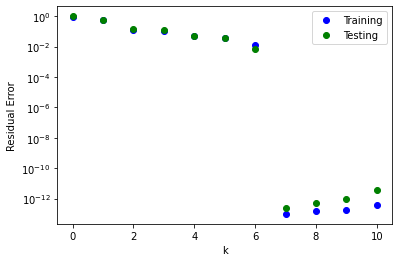

In [13]:
import matplotlib.pyplot as plt

k_polynomials = []
for i in range(0, 11): 
    k_polynomials.append(i)

# Generating residual errors for training set 
training_residual_errors = []
for k in k_polynomials: 
    c, res_error = fit(x_train, y_train, k)
    training_residual_errors.append(res_error)

# Generating residual errors for testing set 
testing_residual_errors = []
for k in k_polynomials: 
    c, res_error = fit(x_test, y_test, k)
    testing_residual_errors.append(res_error)

plt.semilogy(k_polynomials, training_residual_errors, 'bo', label='Training')
plt.semilogy(k_polynomials, testing_residual_errors, 'go', label='Testing')
plt.ylabel('Residual Error')
plt.xlabel('k')
plt.legend()
plt.show()
    

### Problem 1.7 (Exam Style)

## Part 2: Points in Many Dimensions

In [14]:
from math import gamma, sqrt
from matplotlib import pyplot as plt

def gaussian_sample(n, d):
    mean = np.zeros(d)
    mean_distance = 2 * gamma((d + 1) / 2) / gamma(d / 2) if d < 200 else sqrt(2 * d)
    covariance = np.eye(d) / pow(mean_distance, 2)
    return np.random.multivariate_normal(mean, covariance, size=n)

In [15]:
def show_histogram(x, d):
    density, _, _ = plt.hist(x=x, bins='auto', density=True, rwidth=0.9)
    mean = np.mean(x)
    plt.grid(axis='y', alpha=0.75)
    plt.xlabel('Distance')
    plt.ylabel('Empirical Density')
    format_string = '{} dimension{}. Mean distance {:.2f}'
    plt.title(format_string.format(d, 's' if d > 1 else '', mean))

### Problem 2.1

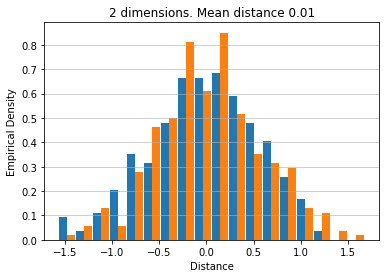

In [16]:
def distances(points):
    euc_distances = []
    for point1 in range(len(points)):
        # prevents zero distance between a point and itself from being included
        for point2 in range(point1+1, len(points)):
            # calculating euclidiean distance
            euc_distances.append(np.sqrt(np.sum(np.square(points[point1]-points[point2]))))
    return euc_distances              
    
# generating histogram from a Gaussian distribution of 300 points in 2 dimensions
test_points = gaussian_sample(300, 2)   
dist = distances(test_points)
show_histogram(test_points, 2)

### Problem 2.2

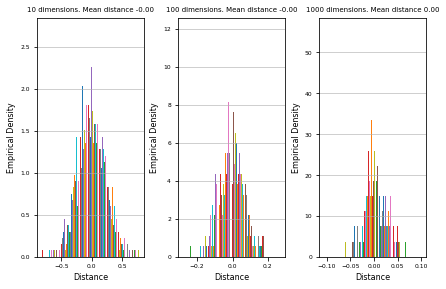

In [43]:
test_points_10 = gaussian_sample(300, 10)
dist_10 = distances(test_points_10)

test_points_100 = gaussian_sample(300, 100)
dist_100 = distances(test_points_100)

test_points_1000 = gaussian_sample(300, 1000)
dist_1000 = distances(test_points_1000)

plt.subplots_adjust(left = 0, right = 2, wspace=.3)

plt.subplot(1,3,1)
show_histogram(test_points_10, 10)

plt.subplot(1,3,2)
show_histogram(test_points_100, 100)

plt.subplot(1,3,3)
show_histogram(test_points_1000, 1000)

plt.tight_layout()

### Problem 2.3

The empirical distributions in the previous two problems suggest that as dimensionality increases, the absciass from the mean Euclidean distance of zero decreases as can be determined from the decreasing distances on the x-axis. 

### Problem 2.4

As we observe in the previous part, as dimensionality of the domain increases, the standard deviation of the normal Gaussian distribution of domain $X$ from the mean decreases. These observations confirm why determination of the nearest-neighbor classifier by the Euclidean metric would degrade as the dimensionality becomes increasingly large. For more efficient classification by nearest-neighbors, we would want a wider Gaussian distribution to better distinguish two distinct data points from the training set $T$, as the quality of our training set classification will influence the ability of the algorithm to infer information about new data points. 